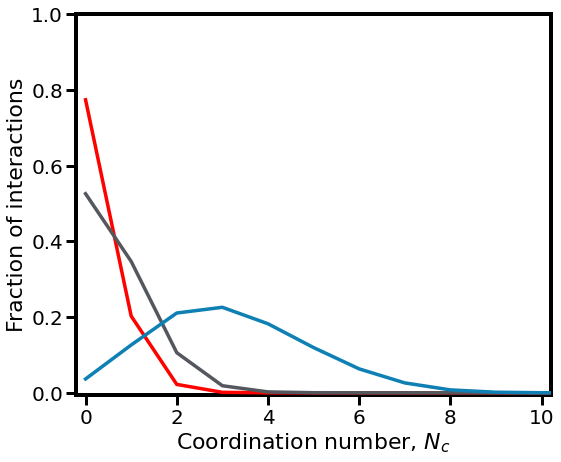

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as colors
from scipy import stats
from scipy.optimize import curve_fit

%matplotlib inline

Nc_plot_e0 = [ 0.7738411,  0.202704,  0.022198, 0.0012491, 0.0000084,         0,         0,         0,         0,         0,         0,         0]
Nc_plot_e25 = [0.5258109, 0.3470334, 0.1058898, 0.0186735, 0.0023279, 0.0002636,         0,         0,         0,         0,         0,         0]
Nc_plot_e6 = [ 0.0365696, 0.1263266, 0.2107419, 0.2258442, 0.1823553, 0.1194757, 0.0631541, 0.0261357, 0.0076678, 0.0015121, 0.0002005, 0.0000126]
Nc = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

fig, ax = plt.subplots()

plt.plot(Nc,Nc_plot_e0,color='#FE0200',linewidth=3.5,zorder=3)
plt.plot(Nc,Nc_plot_e25,color='#54585E',linewidth=3.5,zorder=3)
plt.plot(Nc,Nc_plot_e6,color='#0E80B4',linewidth=3.5,zorder=3)

ax.set_ylim(-0.005,1)
ax.set_xlim(-0.2,10.2)
ax.set_xlabel('Coordination number, $N_c$',size=22)
ax.set_ylabel('Fraction of interactions',size=22)

for ax in [ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(4)
    ax.spines['right'].set_linewidth(4)
    ax.tick_params(axis='both', labelsize=20,width=3,length=10)
    
fig.set_size_inches(8.5, 7)
plt.savefig('./images/Nc.png', bbox_inches='tight', dpi=300)


1.3195655063711804
1.4338246625238908
1.646261563141876
1.9125832940028316
2.4828085704053313
4.143705872653412


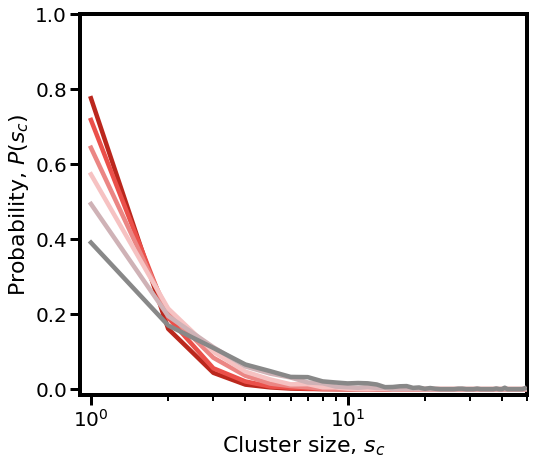

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as colors
from scipy.constants import Avogadro
from scipy import stats
from scipy.optimize import curve_fit

%matplotlib inline

mult = 22.934733552532101
conc = 6912/Avogadro/(1e-24*(5.2*mult)**3)

ClustSize_plot = np.loadtxt('../FIGS3__Microstructure/ClustSize_plot.txt')

size = np.linspace(1,49,num=49)

fig, ax = plt.subplots()
for i in range (0,6):
    calc = conc/(np.average(size, weights=ClustSize_plot[:,i])-1)
    print(np.average(size, weights=ClustSize_plot[:,i]))

plt.plot(size,ClustSize_plot[:,0],color='#BB271D',linewidth=4.5,zorder=3)
plt.plot(size,ClustSize_plot[:,1],color='#EB504A',linewidth=4.5,zorder=3)
plt.plot(size,ClustSize_plot[:,2],color='#EB8684',linewidth=4.5,zorder=3)
plt.plot(size,ClustSize_plot[:,3],color='#F6C2C2',linewidth=4.5,zorder=3)
plt.plot(size,ClustSize_plot[:,4],color='#CFB2B6',linewidth=4.5,zorder=3)
plt.plot(size,ClustSize_plot[:,5],color='#888888',linewidth=4.5,zorder=3)

ax.set_xscale('log')
ax.set_ylim(-0.015,1)
ax.set_xlim(0.91,50)
ax.set_xlabel('Cluster size, $s_c$',size=22)
ax.set_ylabel('Probability, $P(s_c)$',size=22)

for ax in [ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(4)
    ax.spines['right'].set_linewidth(4)
    ax.tick_params(axis='both', labelsize=20,width=3,length=10)
    ax.tick_params(which='minor', length=6,width=2)
    
fig.set_size_inches(8, 7)
plt.savefig('./images/ClusterSize.png', bbox_inches='tight', dpi=300)

0 1.2217297094506693e-08
25 8.28618294580607e-08


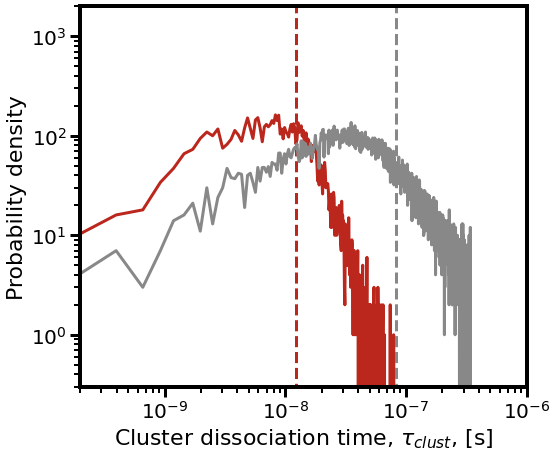

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as colors
from scipy.constants import Avogadro
from scipy import stats
from scipy.optimize import curve_fit
from matplotlib.ticker import FormatStrFormatter

%matplotlib inline

tinc = 1
timestep = 0.00001
BT_s = 0.0000000534
sizetime = 159999*tinc*timestep*BT_s*4
fig, ax = plt.subplots()
    
for ax in fig.get_axes():
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(4)
    ax.spines['right'].set_linewidth(4)
    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_ylim(3e-1,2e3)
    ax.set_xlim(2e-10,1e-6)
    ax.set_ylabel('Probability density',size=22)
    ax.set_xlabel(r'Cluster dissociation time, $\tau_{clust}$, [s]',size=22)
    ax.tick_params(axis='both', which='major', labelsize=20,width=3,length=10)
    ax.tick_params(axis='both', which='minor', width=2,length=6)

#### eps0

numfiles = 63
slurmid = 59426359
eps = 0

for i in range(0,numfiles):
    dum = np.loadtxt("../FIGS3__Microstructure/eps{}_all/slurm-{}_{}.out".format(eps,slurmid,i+1))
    if i==0:
        clustertime_test = dum
    else:
        clustertime_test = np.append(clustertime_test, dum, axis=0)
clustertime_test[:,1] *= tinc*timestep*BT_s*4

all_hist = []
for j in range(0,np.size(clustertime_test[:,1])):
    if (clustertime_test[j,0] != 2):
        all_hist.append(clustertime_test[j,1])
n, bins_all = np.histogram(all_hist,bins=np.linspace(2e-12,1e-6,num=3800))
mids = 0.5*(bins_all[1:] + bins_all[:-1])
mean = np.average(mids, weights=n)
ax.plot([mean, mean],[1e-4,1.75e8],linewidth=3,color='#BB271D',linestyle='dashed')
print("{} {}".format(eps, mean))
ax.plot(mids, n,linewidth=3, color='#BB271D')


#### eps2.5

numfiles = 63
slurmid = 59426961
eps = 25

for i in range(0,numfiles):
    dum = np.loadtxt("../FIGS3__Microstructure/eps{}_all/slurm-{}_{}.out".format(eps,slurmid,i+1))
    if i==0:
        clustertime_test = dum
    else:
        clustertime_test = np.append(clustertime_test, dum, axis=0)

clustertime_test[:,1] *= tinc*timestep*BT_s*4

all_hist = []
for j in range(0,np.size(clustertime_test[:,1])):
    if (clustertime_test[j,0] != 2):
        all_hist.append(clustertime_test[j,1])
n, bins_all = np.histogram(all_hist,bins=np.linspace(2e-12,1e-6,num=3800))
mids = 0.5*(bins_all[1:] + bins_all[:-1])
mean = np.average(mids, weights=n)
ax.plot([mean, mean],[1e-4,1.75e8],linewidth=3,color='#888888',linestyle='dashed')
print("{} {}".format(eps, mean))
ax.plot(mids, n, linewidth=3, color='#888888')

####

for ax in fig.get_axes():
    ax.label_outer()
    
fig.set_size_inches(8,7)    
plt.savefig('./images/clust_dist_times.png', bbox_inches='tight', dpi=300)
